# Fitting `UniLasso` for specified regularization path

In [1]:
from unilasso import *

## Linear Regression Example

Let's first simulate some data using the included simulation script provided by the package.

Then we fit UniLasso for specified regularization path, `0.01, 0.02, 0.1, 0.2` (ordering does not matter).

In [2]:
X, y = simulate_gaussian_data(n=1000, p=100)
gaussian_fit = fit_unilasso(X, 
                            y, 
                            family = 'gaussian',
                            lmdas = [0.01, 0.02, 0.1, 0.2] # Regularization parameters for Lasso
                            )

 75%|          | 0/4 [00:00:00<?, ?it/s]███████   | 3/4 [00:00:00<00:00:00, 1624.81it/s] [dev:93.3%]


We should print out the regularization path to see for which parameters the `UniLasso` model was run.

In [3]:
print(gaussian_fit.lmdas)

[0.01 0.02 0.1 ]


Now, we can extract the returned coefficients and intercepts and print their shapes.

In [4]:
coef, intercept = gaussian_fit.coef, gaussian_fit.intercept

print(coef.shape)
print(intercept.shape)

(3, 100)
(3,)


`coef[0, :]` correpsonds to the coefficients for $\lambda = 0.02$.

In [5]:
coef[0, ]

array([ 1.02291925, -0.57393933,  0.93555354,  0.11249082, -0.        ,
       -0.        ,  0.42237449, -0.97028365,  0.9165355 , -0.33550419,
       -0.74400091,  1.00129123, -0.23022002, -0.13277874, -0.51213279,
        0.85625599,  0.85421885, -0.76792069, -0.        , -0.59840574,
       -0.86390493, -0.27671422, -0.        , -1.10319336, -1.04428148,
        0.10936006, -0.        ,  0.27283678,  0.01544786,  0.88385198,
       -0.42806766, -0.        ,  0.17150333, -0.77076165,  0.31051994,
       -0.41930026,  0.60421119,  0.        , -1.02125794,  0.85236157,
       -1.02093814,  0.52224106, -0.66456143,  0.80469988, -0.64254974,
       -1.00196925,  0.76156285, -0.        , -0.64223529, -0.75614849,
        0.12309637, -0.7591614 , -0.15830568, -0.        ,  0.        ,
        0.84608368, -0.01100525,  0.81839919,  0.82886863,  0.        ,
        0.98354154, -0.16360106,  0.67654108, -0.        , -0.56502571,
        0.58818873,  1.02347167,  0.        , -0.52915668,  0.64

### Predict on new data

To get predictions, we call `predict`:

In [6]:
y_hat = predict(X, gaussian_fit)
print(y_hat.shape)

(1000, 3)


We can also call `predict` for a specific index of $\lambda$:

In [7]:
y_hat_lmda_1 = predict(X, gaussian_fit, lmda_idx = 1)
print(y_hat_lmda_1.shape)

(1000,)


### One regularization parameter

We can also input only one regularization parameter:

In [8]:
gaussian_fit_one_lmda = fit_unilasso(X, y, family = 'gaussian', lmdas = 0.2, verbose = True)

100%|          | 0/1 [00:00:00<?, ?it/s]██████████| 1/1 [00:00:00<00:00:00, 1002.21it/s] [dev:71.2%]██████████| 1/1 [00:00:00<00:00:00, 239.06it/s] [dev:71.2%] 


AxisError: axis 1 is out of bounds for array of dimension 1

## Logistic Regression Example

Now we run an example logistic regression model using `UniLasso`. We set `verbose = True` to print out some summary information of the model.

In [9]:
X, y = simulate_binomial_data(n=1000, p=10)

binomial_fit = fit_unilasso(X,
                            y,
                            family = 'binomial',
                            lmdas = [0.01, 0.02, 0.1, 0.2], # Regularization parameters for Lasso
                            verbose = True
                            )

100%|          | 0/4 [00:00:00<?, ?it/s]██████████| 4/4 [00:00:00<00:00:00, 2394.97it/s] [dev:26.8%]██████████| 4/4 [00:00:00<00:00:00, 557.28it/s] [dev:26.8%] 


Number of Selected Features: [7 6 1 0]
Regularization path (rounded to 3 decimal places): [0.01 0.02 0.1  0.2 ]


In [10]:
binomial_fit.lmdas

array([0.01, 0.02, 0.1 , 0.2 ])

## Survival Analysis Example

In [11]:
X, y = simulate_cox_data(n=1000, p=10)

cox_fit = fit_unilasso(X,
                       y,
                       family = 'cox',
                       lmdas = [0.01, 0.02, 0.1, 0.2], # Regularization parameters for Lasso
                       verbose = True
                       )

100%|          | 0/4 [00:00:00<?, ?it/s]██████████| 4/4 [00:00:00<00:00:00, 860.60it/s] [dev:11.2%]██████████| 4/4 [00:00:00<00:00:00, 156.81it/s] [dev:11.2%]


Number of Selected Features: [7 7 2 0]
Regularization path (rounded to 3 decimal places): [0.01 0.02 0.1  0.2 ]


# Cross-validated `UniLasso`

If we don't have a prespecified list of regularization path or regularization parameter, we can perform cross-validation to select a penalization parameter for us. We again begin by simulating some Gaussian data.

In [12]:
X, y = simulate_gaussian_data(n=1000, p=10)

In [13]:
cv_fit = cv_unilasso(X,
                     y,
                     family = 'gaussian',
                     verbose = True
                     )

100%|          | 0/100 [00:00:00<?, ?it/s]██████████| 100/100 [00:00:00<00:00:00, 48397.81it/s] [dev:80.5%]██████████| 100/100 [00:00:00<00:00:00, 23209.48it/s] [dev:80.5%]


Number of Selected Features: [ 0  2  2  3  3  3  4  5  5  5  5  5  5  5  5  6  6  6  6  7  7  7  7  7
  7  7  7  7  7  7  7  7  7  8  8  9  9  9  9  9  9  9  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10]
Regularization path (rounded to 3 decimal places): [0.873 0.795 0.725 0.66  0.602 0.548 0.499 0.455 0.415 0.378 0.344 0.314
 0.286 0.26  0.237 0.216 0.197 0.179 0.164 0.149 0.136 0.124 0.113 0.103
 0.094 0.085 0.078 0.071 0.065 0.059 0.054 0.049 0.044 0.041 0.037 0.034
 0.031 0.028 0.025 0.023 0.021 0.019 0.018 0.016 0.015 0.013 0.012 0.011
 0.01  0.009 0.008 0.008 0.007 0.006 0.006 0.005 0.005 0.004 0.004 0.004
 0.003 0.003 0.003 0.002 0.002 0.002 0.002 0.002 0.002 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.   ]
Best Regul

Now, we can extract the best $\lambda$.

In [14]:
best_lmda = cv_fit.best_lmda
print(best_lmda)

0.0002428393673407674


In [15]:
cv_fit.lasso_model.betas.toarray()[cv_fit.best_idx]

array([0.9754776 , 1.09144781, 1.04616067, 0.93926579, 1.10510236,
       0.88946728, 0.81583388, 0.36892754, 1.04687051, 1.02893568])

We can also extract the coefficients and intercept corresponding to the best model as follows:

In [16]:
best_coef, best_intercept = cv_fit.coef[cv_fit.best_idx, ], cv_fit.intercept[cv_fit.best_idx]

print(best_intercept)

0.03300607037788944


Let's visualize the average CV loss.

(<Figure size 900x600 with 1 Axes>,
 <Axes: title={'center': 'K-Fold CV Mean Loss'}, xlabel='$-\\log(\\lambda)$', ylabel='Mean Loss'>)

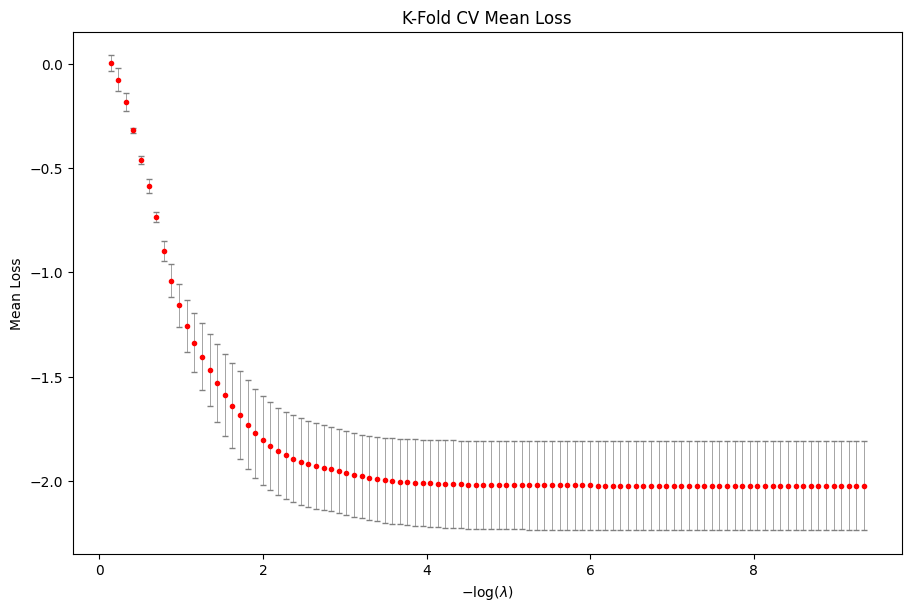

In [17]:
cv_fit.cv_plot()

## Features with zero variance will be removed automatically

If any column of our input data has zero variance, it will be removed by default.

In [18]:
X, y = simulate_binomial_data(n=1000, p=10)

# Make the first column zero variance
X[:, 0] = 1
zero_var_fit = fit_unilasso(X,
                            y,
                            family = 'binomial',
                            lmdas = [0.01, 0.02, 0.1, 0.2], 
                            verbose = True
                            )

100%|          | 0/4 [00:00:00<?, ?it/s]██████████| 4/4 [00:00:00<00:00:00, 4955.09it/s] [dev:19.0%]██████████| 4/4 [00:00:00<00:00:00, 608.69it/s] [dev:19.0%] 


Number of Selected Features: [5 3 1 0]
Regularization path (rounded to 3 decimal places): [0.01 0.02 0.1  0.2 ]


Note that the corresponding coefficient for the first column is 0 across regularization parameters.

In [19]:
print(zero_var_fit.coef[:, 0])

[0. 0. 0. 0.]
